# Titanic Survival Prediction

## Predict wheather a passesnger survived the titanic disaster based on there characterstics.

In [1]:
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
# from sklearn 

In [2]:
dataset = sns.load_dataset('titanic')

In [3]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
dataset.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df = pd.DataFrame(dataset)

# Handling Missing Value:

In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

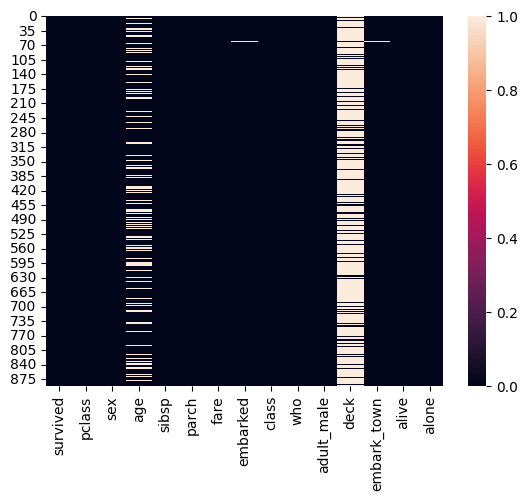

In [8]:
sns.heatmap(df.isnull())

C:\Users\ROSHAN KUMAR SHAKYA\AppData\Local\Temp\ipykernel_4960\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

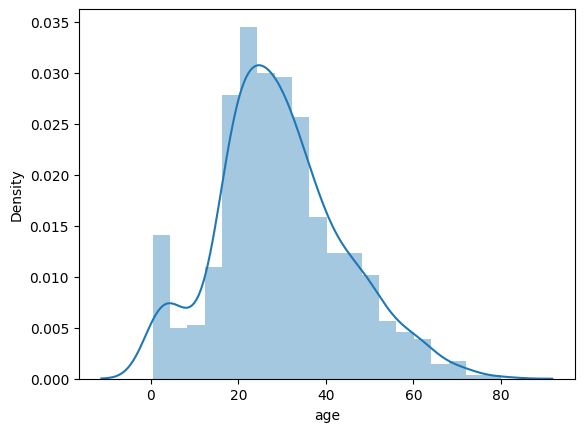

In [9]:
sns.distplot(df['age'])

In [10]:
df['age'] = df['age'].fillna(df['age'].mean())

In [11]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [13]:
mode_em = df[df.age.notna()].embarked.mode()[0]
mode_em
mode_et = df[df.age.notna()].embark_town.mode()[0]
mode_et


'Southampton'

In [14]:
df.embarked = df.embarked.fillna(mode_em)
df.embark_town= df.embark_town.fillna(mode_et)

In [15]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [17]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [18]:
# df.duplicated().sum()

In [19]:
# Removing duplicate rows
# df = df.drop_duplicates()

In [20]:
# df.duplicated().sum()

In [21]:
df_titanic = df.drop(columns=['deck'])


In [22]:
df_titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [23]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [24]:
# sns.pairplot(df_titanic)

In [25]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [26]:
df_titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [27]:
df_titanic['sex'] = df_titanic.sex.map({'male':0,'female':1})

In [28]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [29]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(5), object(4)
memory usage: 79.4+ KB


In [30]:
df_titanic.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
df_titanic['embarked'] = df_titanic.embarked.map({'S':0,'C':1,'Q':2})

In [32]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0,Third,man,True,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,1,First,woman,False,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,0,Third,woman,False,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,0,First,woman,False,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,0,Third,man,True,Southampton,no,True


In [33]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    int64   
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(6), object(3)
memory usage: 79.4+ KB


In [34]:
df_titanic.alive.unique()

array(['no', 'yes'], dtype=object)

In [35]:
df_titanic['alive'] = df_titanic.alive.map({'no':0,'yes':1})

In [36]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    int64   
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    int64   
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(7), object(2)
memory usage: 79.4+ KB


In [37]:
df_titanic.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
encoder = OneHotEncoder()

In [40]:
df1 = pd.DataFrame(encoder.fit_transform(df_titanic[['embark_town']]).toarray(),columns=encoder.get_feature_names_out())
df1

,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [41]:
df2 = pd.DataFrame(encoder.fit_transform(df_titanic[['class']]).toarray(),columns=encoder.get_feature_names_out())
df2

,class_First,class_Second,class_Third
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,1.0,0.0
887,1.0,0.0,0.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [42]:
df_titanic.adult_male.unique()

array([ True, False])

In [43]:
# df_titanic['adult_male'] = df_titanic.who.map({'True':1,'False':0,})

In [44]:
df3 = pd.DataFrame(encoder.fit_transform(df_titanic[['who']]).toarray(),columns=encoder.get_feature_names_out())
df3

,who_child,who_man,who_woman
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
886,0.0,1.0,0.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,0.0,1.0,0.0


In [45]:
df4 = pd.DataFrame(encoder.fit_transform(df_titanic[['adult_male']]).toarray(),columns=encoder.get_feature_names_out())
df4

,adult_male_False,adult_male_True
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [46]:
df_titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [47]:
df_titanic.drop(['class', 'who', 'adult_male', 'embark_town'],axis =1 ,inplace = True)
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alive,alone
0,0,3,0,22.000000,1,0,7.2500,0,0,False
1,1,1,1,38.000000,1,0,71.2833,1,1,False
2,1,3,1,26.000000,0,0,7.9250,0,1,True
3,1,1,1,35.000000,1,0,53.1000,0,1,False
4,0,3,0,35.000000,0,0,8.0500,0,0,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0,True
887,1,1,1,19.000000,0,0,30.0000,0,1,True
888,0,3,1,29.699118,1,2,23.4500,0,0,False
889,1,1,0,26.000000,0,0,30.0000,1,1,True


In [48]:
final_df = pd.concat([df_titanic,df1,df2,df3,df4], axis=1)
final_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alive,alone,...,embark_town_Queenstown,embark_town_Southampton,class_First,class_Second,class_Third,who_child,who_man,who_woman,adult_male_False,adult_male_True
0,0,3,0,22.000000,1,0,7.2500,0,0,False,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,1,1,38.000000,1,0,71.2833,1,1,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,3,1,26.000000,0,0,7.9250,0,1,True,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1,1,1,35.000000,1,0,53.1000,0,1,False,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,3,0,35.000000,0,0,8.0500,0,0,True,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0,True,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,1,1,1,19.000000,0,0,30.0000,0,1,True,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
888,0,3,1,29.699118,1,2,23.4500,0,0,False,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
889,1,1,0,26.000000,0,0,30.0000,1,1,True,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# EDA for Final DataSet

In [49]:
final_df.head(895)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alive,alone,...,embark_town_Queenstown,embark_town_Southampton,class_First,class_Second,class_Third,who_child,who_man,who_woman,adult_male_False,adult_male_True
0,0,3,0,22.000000,1,0,7.2500,0,0,False,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,1,1,38.000000,1,0,71.2833,1,1,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,3,1,26.000000,0,0,7.9250,0,1,True,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1,1,1,35.000000,1,0,53.1000,0,1,False,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,3,0,35.000000,0,0,8.0500,0,0,True,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0,True,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,1,1,1,19.000000,0,0,30.0000,0,1,True,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
888,0,3,1,29.699118,1,2,23.4500,0,0,False,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
889,1,1,0,26.000000,0,0,30.0000,1,1,True,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [50]:
final_df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alive,alone,...,embark_town_Queenstown,embark_town_Southampton,class_First,class_Second,class_Third,who_child,who_man,who_woman,adult_male_False,adult_male_True
886,0,2,0,27.000000,0,0,13.00,0,0,True,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,1,1,1,19.000000,0,0,30.00,0,1,True,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
888,0,3,1,29.699118,1,2,23.45,0,0,False,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
889,1,1,0,26.000000,0,0,30.00,1,1,True,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
890,0,3,0,32.000000,0,0,7.75,2,0,True,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [51]:
#duplicates0.21
final_df.duplicated().sum()

111

## There is 111 Duplicates values

In [52]:
# Removing duplicate rows
final_df = final_df.drop_duplicates()

In [53]:
# Rechecking duplicates


final_df.duplicated().sum()

0

In [54]:
final_df.shape

(780, 21)

In [55]:
final_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'alive', 'alone', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton', 'class_First',
       'class_Second', 'class_Third', 'who_child', 'who_man', 'who_woman',
       'adult_male_False', 'adult_male_True'],
      dtype='object')

In [56]:
#Checking Missing Values

final_df.isnull().sum()

survived                   0
pclass                     0
sex                        0
age                        0
sibsp                      0
parch                      0
fare                       0
embarked                   0
alive                      0
alone                      0
embark_town_Cherbourg      0
embark_town_Queenstown     0
embark_town_Southampton    0
class_First                0
class_Second               0
class_Third                0
who_child                  0
who_man                    0
who_woman                  0
adult_male_False           0
adult_male_True            0
dtype: int64

### There is no missing values.

In [57]:
final_df.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alive,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,class_First,class_Second,class_Third,who_child,who_man,who_woman,adult_male_False,adult_male_True
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,0.412821,2.246154,0.374359,29.797600,0.525641,0.417949,34.829108,0.347436,0.412821,0.198718,0.074359,0.726923,0.271795,0.210256,0.517949,0.105128,0.574359,0.320513,0.425641,0.574359
std,0.492657,0.854452,0.484267,13.708883,0.988046,0.838536,52.263440,0.613126,0.492657,0.399291,0.262523,0.445826,0.445170,0.407752,0.499998,0.306915,0.494757,0.466973,0.494757,0.494757
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.750000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,15.950000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,34.375000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
final_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alive,alone,...,embark_town_Queenstown,embark_town_Southampton,class_First,class_Second,class_Third,who_child,who_man,who_woman,adult_male_False,adult_male_True
0,0,3,0,22.0,1,0,7.2500,0,0,False,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,1,1,38.0,1,0,71.2833,1,1,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,3,1,26.0,0,0,7.9250,0,1,True,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1,1,1,35.0,1,0,53.1000,0,1,False,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,3,0,35.0,0,0,8.0500,0,0,True,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## Train Test split

In [59]:
from sklearn.model_selection import train_test_split

predictors = final_df.drop("alone",axis=1)
target = final_df["alone"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=42)

In [60]:
X_train.shape

(624, 20)

In [61]:
X_test.shape

(156, 20)

In [62]:
Y_train.shape

(624,)

In [63]:
Y_test.shape

(156,)

# lOGISTIC REGRESSION

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
# Import accuracy_score and LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Initialize and fit the Logistic Regression model
lr = LogisticRegression(max_iter=10)
lr.fit(X_train, Y_train)

# Predict on the test set
Y_pred_lr = lr.predict(X_test)
#print(Y_pred_lr)

# Calculate accuracy
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
score_lr = round(accuracy_lr*100,2)
print(f"Logistic Regression Accuracy: {accuracy_lr*100:.2f} %")


Logistic Regression Accuracy: 83.33 %


C:\Users\ROSHAN KUMAR SHAKYA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [67]:
Y_pred_nb.shape

(156,)

In [68]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 100.0 %


### SVM

In [69]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)


In [70]:
Y_pred_svm.shape

(156,)

In [71]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 100.0 %


## K Nearest Neighbors

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [73]:
Y_pred_knn.shape

(156,)

In [74]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 80.77 %


## Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [76]:
print(Y_pred_dt.shape)

(156,)


In [77]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


### Random Forest

In [78]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

# Print the confusion matrix and classification report
print(confusion_matrix(Y_test, Y_pred_rf))
print(classification_report(Y_test, Y_pred_rf))
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")


[[61  0]
 [ 0 95]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        61
        True       1.00      1.00      1.00        95

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156

The accuracy score achieved using Random Forest is: 100.0 %


In [79]:
Y_pred_rf.shape

(156,)

In [80]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


### XGBoost

In [81]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [82]:
Y_pred_xgb.shape

(156,)

In [83]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 100.0 %


# Linear Regression

In [84]:
# Import necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

# Initialize and fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

# Predict on the test set
Y_pred_linear_reg = linear_reg.predict(X_test)

# Assuming binary classification, convert predictions to 0 and 1 using a threshold
threshold = 0.5
Y_pred_binary = (Y_pred_linear_reg >= threshold).astype(int)

# Calculate accuracy
accuracy_linear_reg = accuracy_score(Y_test, Y_pred_binary)
score_linear_reg = round(accuracy_linear_reg * 100, 2)
print(f"Linear Regression Accuracy: {score_linear_reg} %")


Linear Regression Accuracy: 94.23 %


## Output final score

In [85]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_linear_reg]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","KNN","Decision Tree","Random Forest","XGBoost","Linear Regression"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 83.33 %
The accuracy score achieved using Naive Bayes is: 100.0 %
The accuracy score achieved using Support Vector Machine is: 100.0 %
The accuracy score achieved using KNN is: 80.77 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using Random Forest is: 100.0 %
The accuracy score achieved using XGBoost is: 100.0 %
The accuracy score achieved using Linear Regression is: 94.23 %


C:\Users\ROSHAN KUMAR SHAKYA\AppData\Local\Temp\ipykernel_4960\1597670272.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algorithms,y=scores, palette="viridis")


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

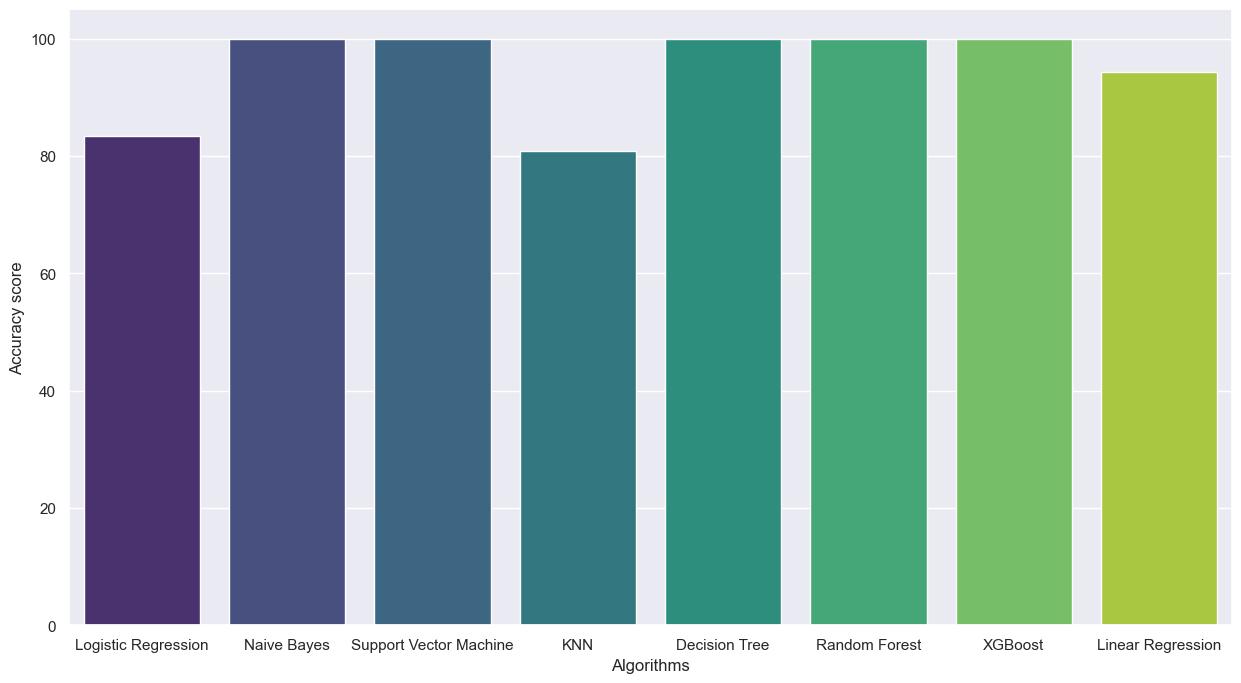

In [86]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores, palette="viridis")

### Here, Logistic Regression achieved the best accuracy of 83.33% compared to other algorithms, because other algo are overfitted.

# Predicating "Target" using Logistic Regression on given data.


C:\Users\ROSHAN KUMAR SHAKYA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Predicted target value using Logistic Regression: 1


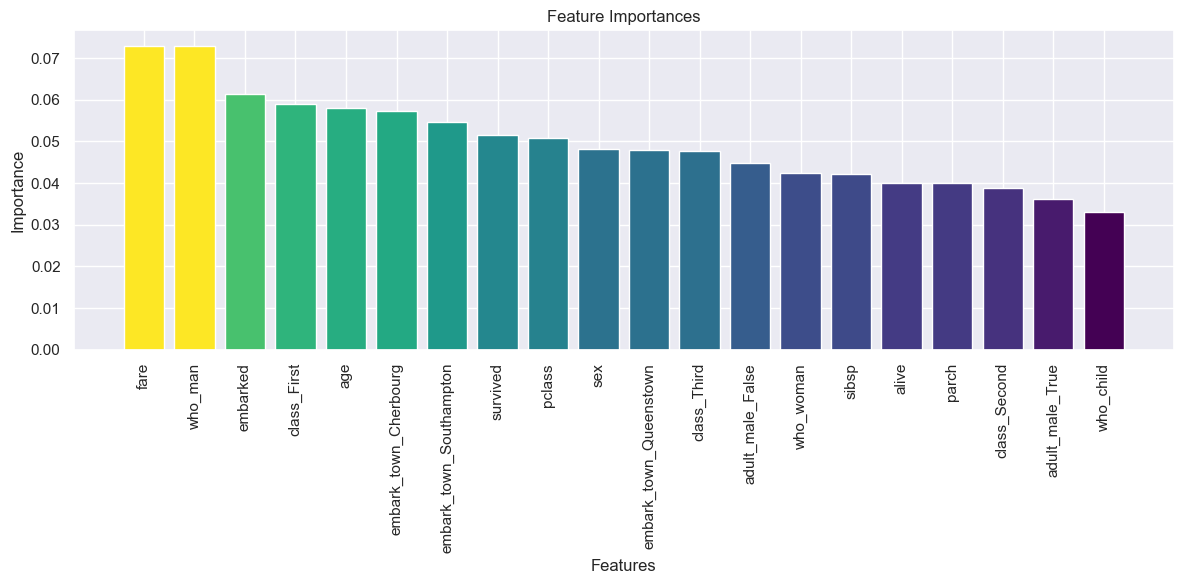

In [87]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from matplotlib.colors import Normalize

# Sample data for prediction (Assuming one sample with correct number of features)
# Adjust the feature values according to the actual expected format
sample_data = [
    [1, 3, 1, 22, 1, 0, 7.25, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]  # Removed 'alone'
]

# Assuming 'predictors_columns' are the column names used during training, excluding 'alone'
predictors_columns = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
                      'embarked', 'alive', 'embark_town_Cherbourg',
                      'embark_town_Queenstown', 'embark_town_Southampton', 'class_First',
                      'class_Second', 'class_Third', 'who_child', 'who_man', 'who_woman',
                      'adult_male_False', 'adult_male_True']

# Create DataFrame for sample data
sample_data_df = pd.DataFrame(sample_data, columns=predictors_columns)

# Assuming 'X_train' and 'Y_train' are your training data and labels respectively
# For demonstration purposes, here's a small example:
X_train = np.random.rand(100, 20)  # Example training data (20 features as per predictors_columns without 'alone')
Y_train = np.random.randint(0, 2, 100)  # Example training labels (binary classification)

# Initialize and train your Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, Y_train)

# Predict the target value
predicted_target_lr = lr.predict(sample_data_df)

# Print the predicted target value
print(f"Predicted target value using Logistic Regression: {predicted_target_lr[0]}")

# Initialize and train RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)

# Plot the feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
colors = viridis(Normalize()(importances[indices]))

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color=colors, align="center")
plt.xticks(range(X_train.shape[1]), [predictors_columns[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


# Result Graph : 

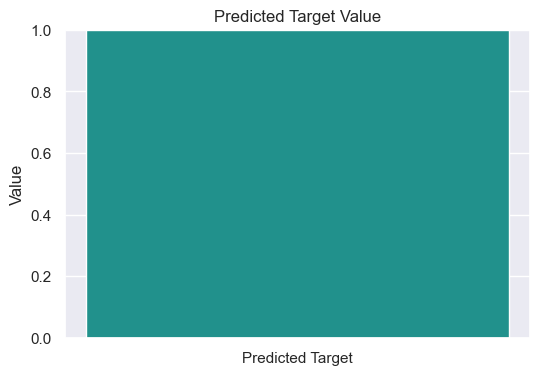

In [88]:

# Plot the predicted target result
plt.figure(figsize=(6, 4))
plt.title("Predicted Target Value")
plt.bar(["Predicted Target"], [predicted_target_lr[0]], color=viridis(0.5))
plt.ylabel("Value")
plt.ylim(0, 1)  # Assuming binary classification (0 or 1)
plt.show()


## Conclusion: 
Here is a succinct result statement for the predicted target value using Logistic Regression:

### "The Logistic Regression model predicts the target value as 1."

# Predicating "Target" using Linear Regression on given data.


C:\Users\ROSHAN KUMAR SHAKYA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Predicted target value using Linear Regression: 0.663618683490919
Predicted target value using Linear Regression (binary): 1


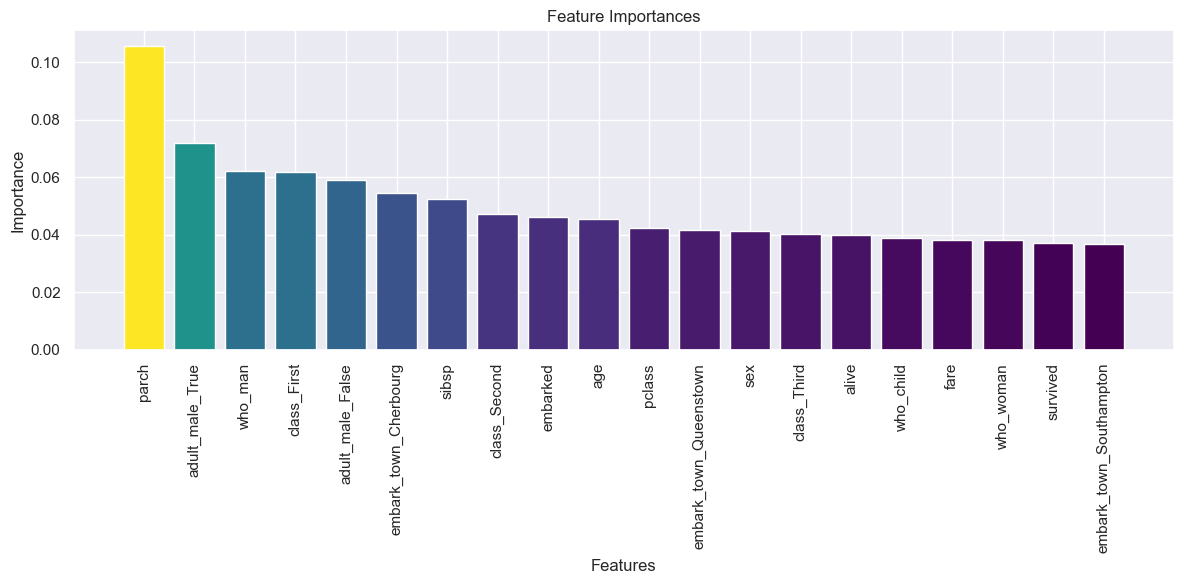

In [89]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from matplotlib.colors import Normalize

# Sample data for prediction (adjust the feature values according to the actual expected format)
sample_data = [
    [1, 3, 1, 22, 1, 0, 7.2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
]

# Assuming 'predictors_columns' are the column names used during training
predictors_columns = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
                      'embarked', 'alive', 'embark_town_Cherbourg',
                      'embark_town_Queenstown', 'embark_town_Southampton', 'class_First',
                      'class_Second', 'class_Third', 'who_child', 'who_man', 'who_woman',
                      'adult_male_False', 'adult_male_True']

# Create DataFrame for sample data
sample_data_df = pd.DataFrame(sample_data, columns=predictors_columns)

# Example training data (randomly generated)
X_train = np.random.rand(100, 20)  # 100 samples, 20 features
Y_train = np.random.randint(0, 2, 100)  # Binary target

# Initialize and train your Linear Regression model
li_reg = LinearRegression()
li_reg.fit(X_train, Y_train)

# Predict the target value using Linear Regression
predicted_target_li_reg = li_reg.predict(sample_data_df)
print(f"Predicted target value using Linear Regression: {predicted_target_li_reg[0]}")

# Convert continuous prediction to binary (0 or 1) using a threshold
predicted_target_li_reg_binary = (predicted_target_li_reg >= 0.5).astype(int)

# Print the binary prediction
print(f"Predicted target value using Linear Regression (binary): {predicted_target_li_reg_binary[0]}")


# Initialize and train RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)

# Plot the feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
colors = viridis(Normalize()(importances[indices]))

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color=colors, align="center")
plt.xticks(range(X_train.shape[1]), [predictors_columns[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


## Conclusion: 
Here is a succinct result statement for the predicted target value using Logistic Regression:

### "The Linear Regression model predicts the target value as 1."

#### Based on the predictions made using the Logistic Regression and Linear Regression models, the results indicate the following:

#### Logistic Regression Model: The model predicts the target value as 1, which corresponds to 'yes' for survival. Therefore, according to this model, the passenger survived the Titanic disaster.

#### Linear Regression Model: The model's predicted value is also converted to 1 when using a threshold for binary classification. This indicates a prediction of 'yes' for survival. Thus, according to this model as well, the passenger survived the Titanic disaster.

## Conclusion:
### Both the Logistic Regression and Linear Regression models predict that the passenger survived the Titanic disaster.






